In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

Binary classification

$$
\begin{align}
g(x_i) \cong y_i \\
i = \text{customer}\land y_i \in \{0, 1\}
\end{align}
$$

Data preparation

In [2]:
df = pd.read_csv('./datasets/Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [5]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [6]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [7]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [8]:
df.totalcharges

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: totalcharges, Length: 7043, dtype: object

In [9]:
tc = pd.to_numeric(df.totalcharges, errors='coerce')

In [10]:
df[tc.isnull()][['customerid', 'totalcharges']]

,customerid,totalcharges
488,4472-lvygi,_
753,3115-czmzd,_
936,5709-lvoeq,_
1082,4367-nuyao,_
1340,1371-dwpaz,_
3331,7644-omvmy,_
3826,3213-vvolg,_
4380,2520-sgtta,_
5218,2923-arzlg,_
6670,4075-wkniu,_


In [11]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')

In [12]:
df.totalcharges = df.totalcharges.fillna(0)

In [13]:
df.churn

0        no
1        no
2       yes
3        no
4       yes
       ... 
7038     no
7039     no
7040     no
7041    yes
7042     no
Name: churn, Length: 7043, dtype: object

In [14]:
(df.churn == 'yes').astype(int).head()

0    0
1    0
2    1
3    0
4    1
Name: churn, dtype: int64

In [15]:
df.churn = (df.churn == 'yes').astype(int)

In [16]:
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,0
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one_year,no,mailed_check,56.95,1889.50,0
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,1
3,7795-cfocw,male,0,no,no,45,no,no_phone_service,dsl,yes,...,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,0
4,9237-hqitu,female,0,no,no,2,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,1


Setting validation framework

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

len(df_train), len(df_val), len(df_test)

(4225, 1409, 1409)

In [19]:
df_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
3897,8015-ihcgw,female,0,yes,yes,72,yes,yes,fiber_optic,yes,...,yes,yes,yes,yes,two_year,yes,electronic_check,115.50,8425.15,0
1980,1960-uycnn,male,0,no,no,10,yes,yes,fiber_optic,no,...,yes,no,no,yes,month-to-month,yes,electronic_check,95.25,1021.55,0
6302,9250-wypll,female,0,no,no,5,yes,yes,fiber_optic,no,...,no,no,no,no,month-to-month,no,electronic_check,75.55,413.65,1
727,6786-obwqr,female,0,yes,yes,5,yes,no,fiber_optic,no,...,no,no,yes,no,month-to-month,yes,electronic_check,80.85,356.10,0
5104,1328-euzhc,female,0,yes,no,18,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,20.10,370.50,0


In [20]:
# dropping the index
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [21]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

In [22]:
# deleting churn series from our dfs
del df_train['churn']
del df_val['churn']
del df_test['churn']

Exploratory data analysys

$$
\begin{align}
\text{Calculate the mean or the curn rate} \\ \\
\frac{1}{n}\sum_{i=0}^{n-1}x_i \\ \\
x_i\in\{0,1\} \\ \\
x = \begin{bmatrix} 1 \\ 0 \\ 0 \\ 1 \\ 0 \\ 1 \\ 1 \\ \vdots \end{bmatrix}
\end{align}
$$

In [23]:
df_full_train = df_full_train.reset_index(drop=True)

In [24]:
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [25]:
df_full_train.churn.value_counts(normalize=True)

churn
0    0.730032
1    0.269968
Name: proportion, dtype: float64

In [26]:
df_full_train.churn.mean()

np.float64(0.26996805111821087)

In [27]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [28]:
categorical = [
    'gender',
    'seniorcitizen',
    'partner',
    'dependents',
    'phoneservice',
    'multiplelines',
    'internetservice',
    'onlinesecurity',
    'onlinebackup',
    'deviceprotection',
    'techsupport',
    'streamingtv',
    'streamingmovies',
    'contract',
    'paperlessbilling',
    'paymentmethod',
]

In [29]:
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

Feature importance based on churn mean

$$
\begin{align}
1) Difference \\
\bullet Global - Group \Rightarrow\text{< 0 more likely to churn, > 0 less likely to churn} \\ \\
2) \text{Risk ratio} \\
\bullet Risk = \frac{Group}{Global} \Rightarrow\text{> 1 more likely to churn, < 1 less likely to churn}
\end{align}
$$

In [30]:
df_full_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0


In [31]:
churn_female = df_full_train[df_full_train.gender == 'female'].churn.mean()
churn_female

np.float64(0.27682403433476394)

In [32]:
churn_male = df_full_train[df_full_train.gender == 'male'].churn.mean()
churn_male

np.float64(0.2632135306553911)

In [33]:
global_churn = df_full_train.churn.mean()
global_churn

np.float64(0.26996805111821087)

In [34]:
from IPython.display import display

In [35]:
for c in categorical:
    print(c)
    df_group = df_full_train.groupby(c).churn.agg(['mean', 'count'])
    df_group['difference'] = df_group['mean'] - global_churn
    df_group['risk'] = df_group['mean'] / global_churn
    display(df_group)
    print()
    print()

gender


,mean,count,difference,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980




seniorcitizen


,mean,count,difference,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208




partner


,mean,count,difference,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472




dependents


,mean,count,difference,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651




phoneservice


,mean,count,difference,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412




multiplelines


,mean,count,difference,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948




internetservice


,mean,count,difference,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201




onlinesecurity


,mean,count,difference,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570




onlinebackup


,mean,count,difference,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660




deviceprotection


,mean,count,difference,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480




techsupport


,mean,count,difference,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390




streamingtv


,mean,count,difference,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328




streamingmovies


,mean,count,difference,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182




contract


,mean,count,difference,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730




paperlessbilling


,mean,count,difference,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560




paymentmethod


,mean,count,difference,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


Feature importance: Mutual information

$$\begin{align}
\text{The Mutual Information is a measure of the similarity between two labels of the same data.} \\
\text{Where $|U_i|$ is the number of the samples in cluster $U_i$ and $|V_i|$ is the number of the samples in cluster $V_i$ ,} \\ 
\text{the Mutual Information between cluster $U$ and $V$ is given as:} \\ \\
MI(U,V)=\sum_{i=1}^{|U|} \sum_{j=1}^{|V|} \frac{|U_i\cap V_j|}{N}
\log\frac{N|U_i \cap V_j|}{|U_i||V_j|}
\end{align}$$

In [36]:
from sklearn.metrics import mutual_info_score

In [37]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.churn)

In [39]:
# appling function to each categorical series
mis = df_full_train[categorical].apply(mutual_info_churn_score)
mis.sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

Feature importance: Correlation

$$
\begin{align}
\text{The Pearson correlation coefficient (PCC) is a correlation coefficient that measures linear correlation between two sets of data. It is the ratio between the covariance of two variables and the product of their standard deviations; thus, it is essentially a normalized measurement of the covariance, such that the result always has a value between −1 and 1. As with covariance itself, the measure can only reflect a linear correlation of variables, and ignores many other types of relationships or correlations. As a simple example, one would expect the age and height of a sample of children from a primary school to have a Pearson correlation coefficient significantly greater than 0, but less than 1 (as 1 would represent an unrealistically perfect correlation).}\\[1em]
\end{align}
$$

$$
\begin{equation*}
  r =
  \frac{ \sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y}) }{%
        \sqrt{\sum_{i=1}^{n}(x_i-\bar{x})^2}\sqrt{\sum_{i=1}^{n}(y_i-\bar{y})^2}}
\end{equation*}
$$

In [41]:
df_full_train.tenure.max()

np.int64(72)

In [44]:
df_full_train[numerical].corrwith(df_full_train.churn).abs()

tenure            0.351885
monthlycharges    0.196805
totalcharges      0.196353
dtype: float64

In [46]:
df_full_train[df_full_train.tenure > 12].churn.mean()

np.float64(0.17634908339788277)

In [47]:
df_full_train[(df_full_train.tenure > 2) & (df_full_train.tenure <= 12)].churn.mean()

np.float64(0.3994413407821229)

One-hot encoding

$$
\begin{align}
&\text{One hot encoding is a technique that we use to represent categorical variables as numerical values in a machine learning model.} \\[1em]
&\text{Advantages:} \\[1em]
&\bullet\text{It allows the use of categorical variables in models that require numerical input.} \\[1em]
&\bullet\text{It can improve model performance by providing more information to the model about the categorical variable.} \\[1em]
&\bullet\text{It can help to avoid the problem of ordinality, which can occur when a categorical variable has a natural ordering (e.g. “small”, “medium”, “large”).} \\[1em]
&\text{Disadvantages:} \\[1em]
&\bullet\text{It can lead to increased dimensionality, as a separate column is created for each category in the variable. This can make the model more complex and slow to train.} \\[1em]
&\bullet\text{It can lead to sparse data, as most observations will have a value of 0 in most of the one-hot encoded columns.} \\[1em]
&\bullet\text{It can lead to overfitting, especially if there are many categories in the variable and the sample size is relatively small.} \\[1em]
&\bullet\text{One-hot-encoding is a powerful technique to treat categorical data, but it can lead to increased dimensionality, sparsity, and overfitting. It is important to use it cautiously and consider other methods such as ordinal encoding or binary encoding.}
\end{align}
$$

In [48]:
from sklearn.feature_extraction import DictVectorizer

In [49]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.fit_transform(val_dict)

In [55]:
list(X_train[:3][0])

[np.float64(0.0),
 np.float64(0.0),
 np.float64(1.0),
 np.float64(0.0),
 np.float64(1.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(1.0),
 np.float64(1.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(1.0),
 np.float64(0.0),
 np.float64(115.5),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(1.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(1.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(1.0),
 np.float64(0.0),
 np.float64(1.0),
 np.float64(0.0),
 np.float64(1.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(1.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(1.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(1.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(1.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(1.0),
 np.float64(72.0),
 np.float64(8425.15)]

Logistic regression

$$
\begin{align}
&\text{Logistic regression is one of the most popular algorithms for binary classification.} \\[0.5em]
&\text{Given a set of examples with features, the goal of logistic regression is to output values between 0 and 1,} \\[0.5em] &\text{which can be interpreted as the probabilities of each example belonging to a particular class.} \\[1em]
\end{align}
$$
$$
\begin{equation*}
    g(x_i) = \frac{1}{1+\exp{-z}}(w_0 + w^Tx_i)
\end{equation*}
$$

In [60]:
# converting score to probability
def sigmoid(z):
    return 1/ (1 + np.exp(-z))

In [61]:
z = np.linspace(-7, 7, 51)

In [62]:
sigmoid(100)

np.float64(1.0)

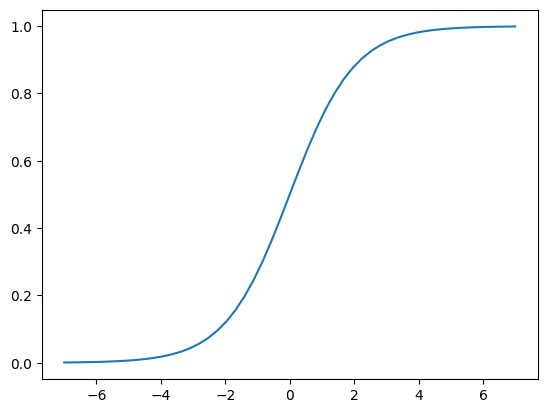

In [63]:
plt.plot(z, sigmoid(z))

In [64]:
def linear_regression(xi):
    result = w0

    for i in range(len(w)):
        result += xi[i] * w[i]

    return result

In [68]:
def logistic_regression(xi):
    score = w0

    for i in range(len(w)):
        score += xi[i] * w[i]

    return sigmoid(score)

Training logistic regression

In [69]:
from sklearn.linear_model import LogisticRegression

In [76]:
model = LogisticRegression(solver='lbfgs', max_iter=3000)

model.fit(X_train, y_train)

LogisticRegression(max_iter=3000)

In [78]:
model.intercept_[0]

np.float64(-0.04535394458009966)

In [86]:
# prob of not churning, prob of churning
model.predict_proba(X_val)

array([[0.99334526, 0.00665474],
       [0.79526624, 0.20473376],
       [0.78251571, 0.21748429],
       ...,
       [0.84812063, 0.15187937],
       [0.21108095, 0.78891905],
       [0.18856626, 0.81143374]])

In [87]:
model.coef_[0].round(3)

array([ 0.683,  0.037, -0.679,  0.056, -0.014,  0.114, -0.16 ,  0.088,
        0.04 ,  0.002, -0.497,  0.699, -0.16 , -0.018, -0.187,  0.066,
        0.163,  0.118, -0.16 ,  0.085,  0.286, -0.16 , -0.083, -0.161,
        0.203, -0.042,  0.084, -0.052, -0.003,  0.109, -0.012,  0.066,
       -0.024,  0.192, -0.093, -0.16 ,  0.296, -0.054, -0.16 ,  0.256,
        0.236, -0.16 , -0.033, -0.069,  0.   ])

In [88]:
y_pred = model.predict_proba(X_val)[:, 1]

In [89]:
churn_decision = (y_pred >= 0.5)

In [90]:
(y_val == churn_decision).mean()

np.float64(0.8026969481902059)

In [91]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = churn_decision.astype(int)
df_pred['actual'] = y_val

In [92]:
df_pred['correct'] = df_pred.prediction == df_pred.actual

In [93]:
df_pred.correct.mean()

np.float64(0.8026969481902059)

In [96]:
churn_decision

array([False, False, False, ..., False,  True,  True])

In [94]:
churn_decision.astype(int)

array([0, 0, 0, ..., 0, 1, 1])

In [95]:
df_pred.head()

,probability,prediction,actual,correct
0,0.006655,0,0,True
1,0.204734,0,0,True
2,0.217484,0,0,True
3,0.564407,1,1,True
4,0.218511,0,0,True


Model interpretation

In [100]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

In [101]:
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

{'contract=month-to-month': np.float64(0.683),
 'contract=one_year': np.float64(0.037),
 'contract=two_year': np.float64(-0.679),
 'dependents=no': np.float64(0.056),
 'dependents=yes': np.float64(-0.014),
 'deviceprotection=no': np.float64(0.114),
 'deviceprotection=no_internet_service': np.float64(-0.16),
 'deviceprotection=yes': np.float64(0.088),
 'gender=female': np.float64(0.04),
 'gender=male': np.float64(0.002),
 'internetservice=dsl': np.float64(-0.497),
 'internetservice=fiber_optic': np.float64(0.699),
 'internetservice=no': np.float64(-0.16),
 'monthlycharges': np.float64(-0.018),
 'multiplelines=no': np.float64(-0.187),
 'multiplelines=no_phone_service': np.float64(0.066),
 'multiplelines=yes': np.float64(0.163),
 'onlinebackup=no': np.float64(0.118),
 'onlinebackup=no_internet_service': np.float64(-0.16),
 'onlinebackup=yes': np.float64(0.085),
 'onlinesecurity=no': np.float64(0.286),
 'onlinesecurity=no_internet_service': np.float64(-0.16),
 'onlinesecurity=yes': np.floa

In [102]:
# selecting a group of features
small = ['contract', 'tenure', 'monthlycharges']

In [103]:
df_train[small].iloc[:10].to_dict(orient='records')

[{'contract': 'two_year', 'tenure': 72, 'monthlycharges': 115.5},
 {'contract': 'month-to-month', 'tenure': 10, 'monthlycharges': 95.25},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 75.55},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 80.85},
 {'contract': 'two_year', 'tenure': 18, 'monthlycharges': 20.1},
 {'contract': 'month-to-month', 'tenure': 4, 'monthlycharges': 30.5},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 75.1},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 70.3},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 19.75},
 {'contract': 'month-to-month', 'tenure': 6, 'monthlycharges': 109.9}]

In [105]:
dicts_train_small = df_train[small].to_dict(orient='records')
dicts_train_val = df_train[small].to_dict(orient='records')

In [106]:
dv_small = DictVectorizer(sparse=False)
dv_small.fit(dicts_train_small)

DictVectorizer(sparse=False)

In [107]:
dv_small.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'monthlycharges', 'tenure'], dtype=object)

In [108]:
X_train_small = dv_small.transform(dicts_train_small)

In [109]:
model_small = LogisticRegression(solver='lbfgs', max_iter=3000)
model_small.fit(X_train_small, y_train)

LogisticRegression(max_iter=3000)

In [110]:
w0 = model_small.intercept_[0]
w0

np.float64(-2.4779575953822954)

In [111]:
w = model_small.coef_[0]
w.round(3)

array([ 0.971, -0.024, -0.948,  0.027, -0.036])

In [112]:
dict(zip(dv_small.get_feature_names_out(), w.round(3)))

{'contract=month-to-month': np.float64(0.971),
 'contract=one_year': np.float64(-0.024),
 'contract=two_year': np.float64(-0.948),
 'monthlycharges': np.float64(0.027),
 'tenure': np.float64(-0.036)}

In [113]:
w0 + (-0.948) + 30 * 0.027 + 24 * (-0.036)

np.float64(-3.479957595382295)

In [115]:
# _ is an environment variable from jupyter notebook, is the last printed value
sigmoid(_)

np.float64(0.029887909284994775)

Using the model

In [116]:
dicts_full_train = df_full_train[categorical + numerical].to_dict(orient='records')

In [117]:
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

In [118]:
y_full_train = df_full_train.churn.values

In [119]:
model = LogisticRegression(solver='lbfgs', max_iter=3000)
model.fit(X_full_train, y_full_train)

LogisticRegression(max_iter=3000)

In [120]:
dicts_test = df_test[categorical + numerical].to_dict(orient='records')

In [122]:
X_test = dv.transform(dicts_test)

In [123]:
y_pred = model.predict_proba(X_test)[:, 1]

In [124]:
churn_decision = (y_pred >= 0.5)

In [125]:
(churn_decision == y_test).mean()

np.float64(0.8105039034776437)

In [126]:
y_test

array([0, 0, 0, ..., 0, 0, 1])

In [127]:
customer = dicts_test[-1]
customer

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'no',
 'deviceprotection': 'yes',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 17,
 'monthlycharges': 104.2,
 'totalcharges': 1743.5}

In [129]:
X_customer = dv.transform([customer])

In [130]:
model.predict_proba(X_customer)[0, 1]

np.float64(0.637685124878236)

In [131]:
y_test[-1]

np.int64(1)